In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import hipp
import os

In [3]:
project_directory = "/home/godinlu/Documents/history-dataset/1978_09_06_aerial"
images_directory = os.path.join(project_directory, "raw_images")
fiducial_directory = os.path.join(project_directory, "fiducials")
output_directory = os.path.join(project_directory, "preprocess_images")
qc_directory = os.path.join(project_directory, "qc")

preproc = hipp.AerialPreprocessing(
    images_directory=images_directory,
    fiducials_directory=fiducial_directory,
    output_directory=output_directory,
    qc_directory=qc_directory
)

In [4]:
preproc.create_fiducial_template(corner=True, distance_around_fiducial=70)

In [5]:
preproc.create_fiducial_template(midside=True, distance_around_fiducial=70)

Fiducials detection: 100%|██████████| 37/37 [00:11<00:00,  3.31it/s]


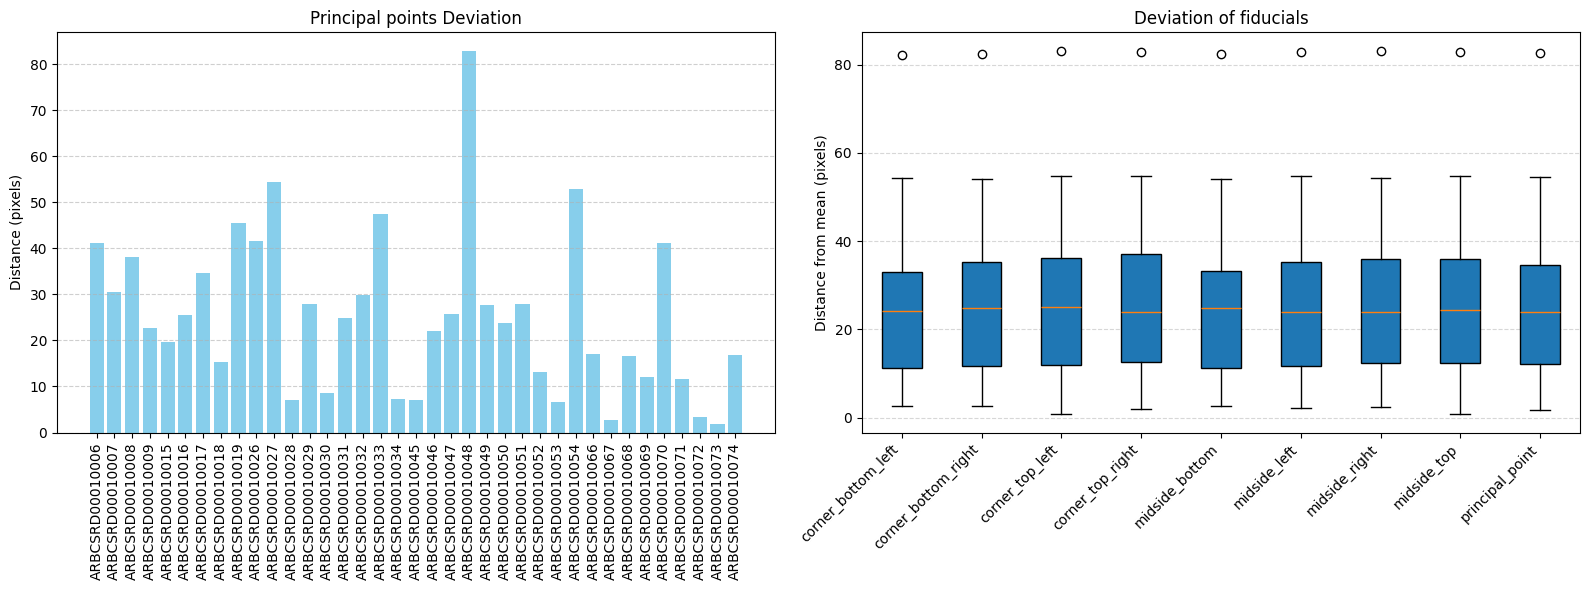

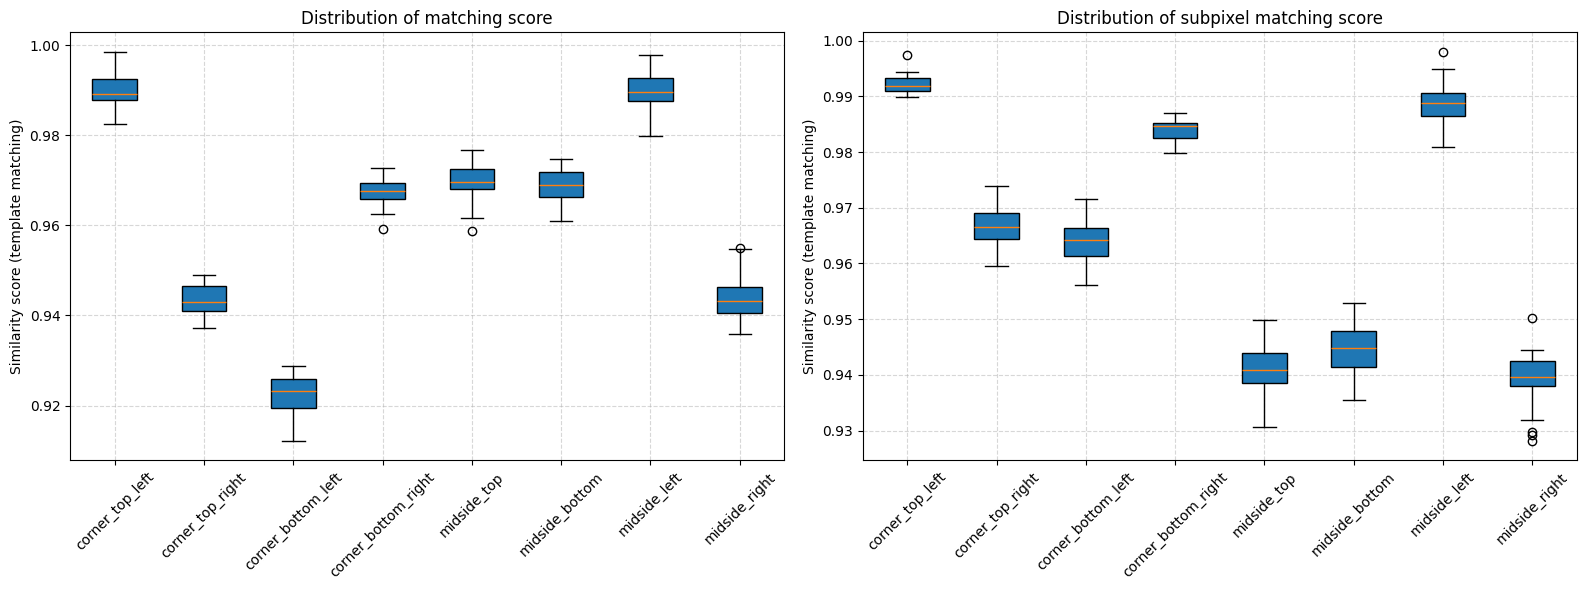

In [6]:
all_detections, all_scores, all_subpixel_scores = preproc.detect_fiducials(grid_size=7, max_workers=5)

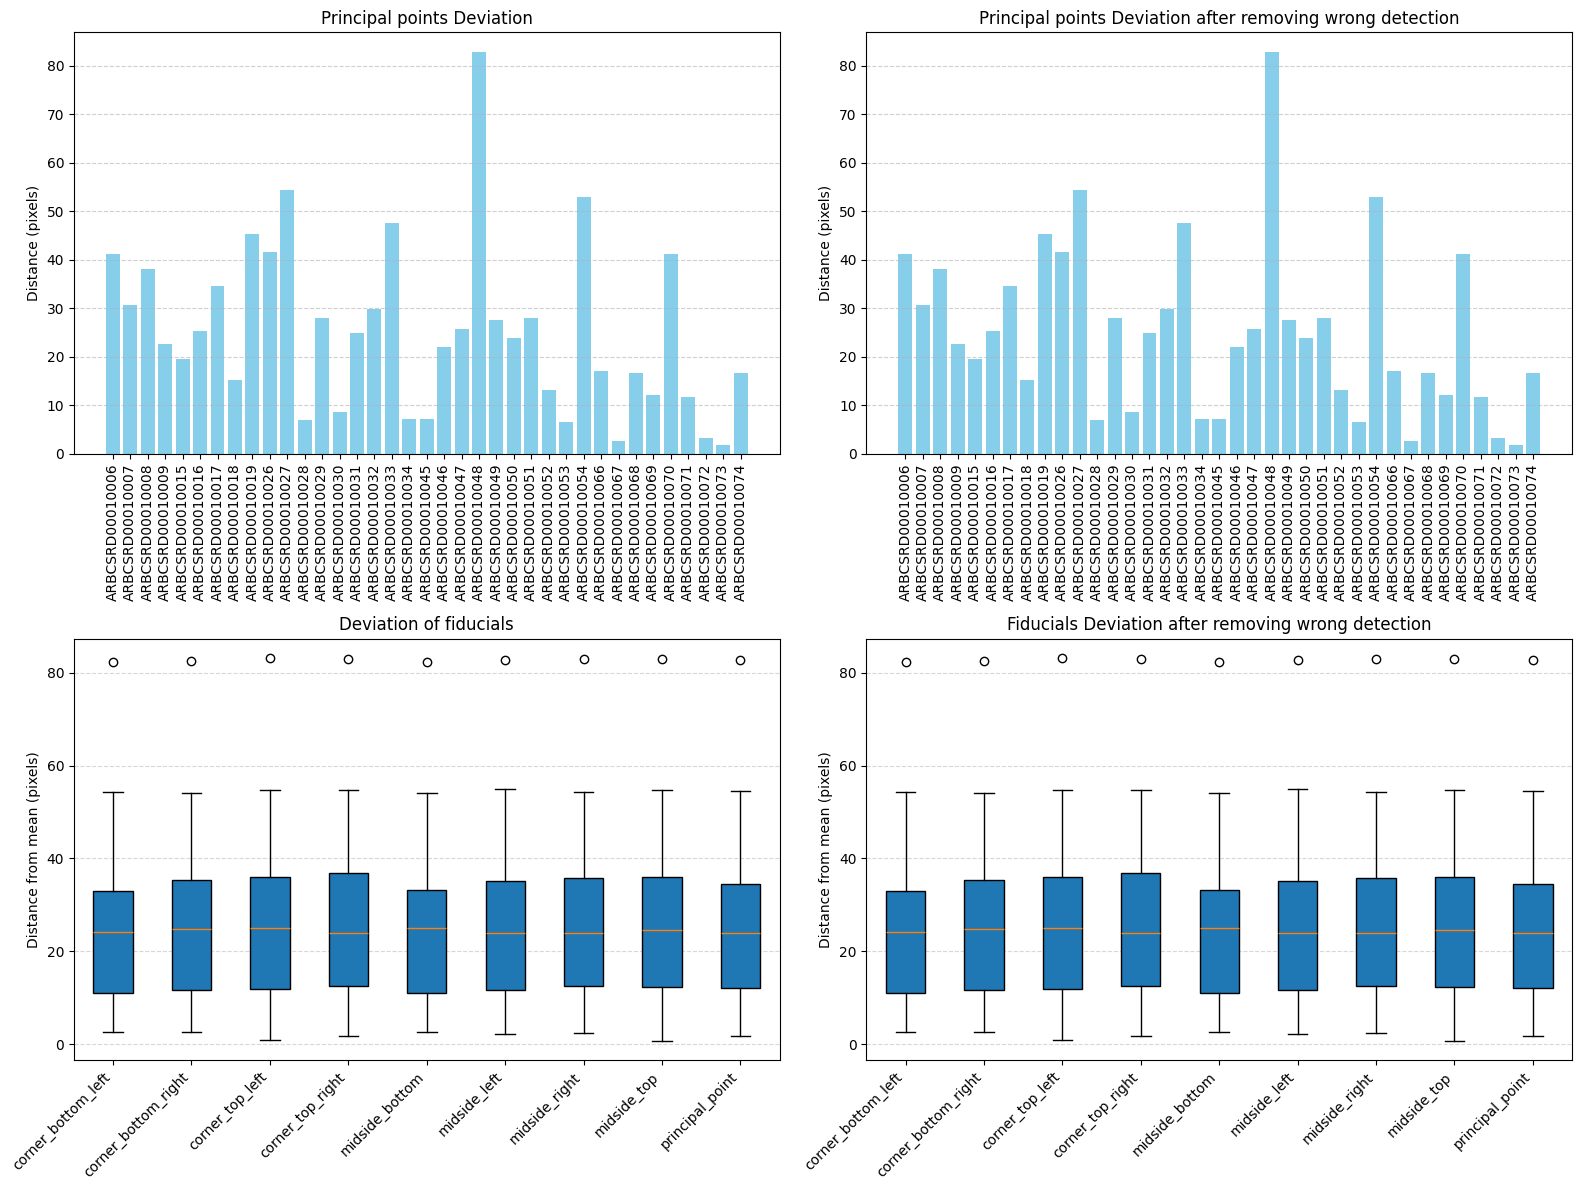

In [7]:
processed_detections = preproc.process_fiducials_detection(all_detections, all_scores, all_subpixel_scores, degree_threshold=0.005)

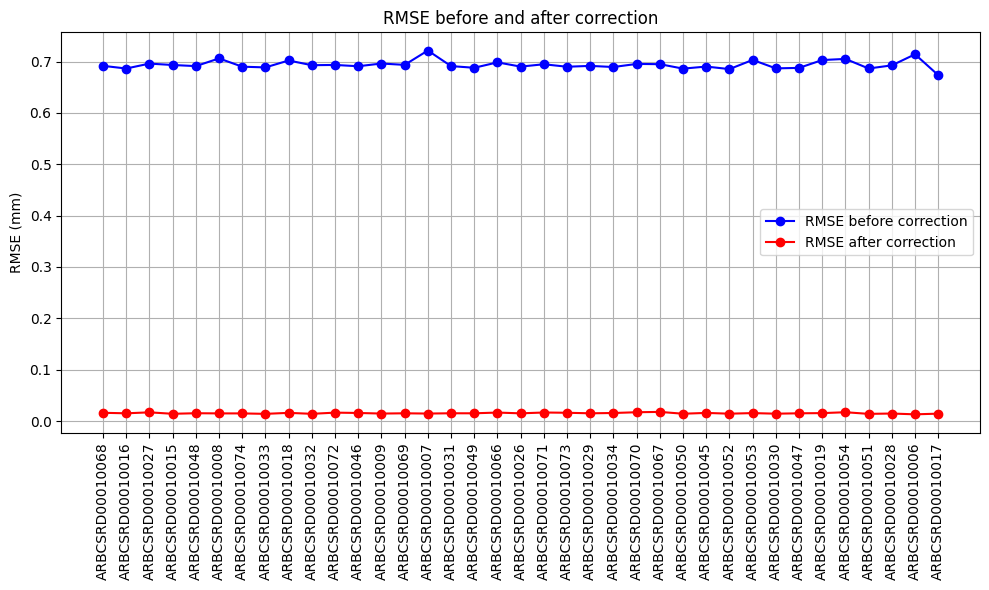

In [8]:
true_fiducials_mm = {
    "corner_bottom_left": (-105.983, -106.005), # 1
    "corner_top_right": (105.996, 106.006), # 2
    "corner_top_left": (-105.998, 105.985), # 3
    "corner_bottom_right": (106.001, -106.005), # 4
    "midside_left": (-110.004, -0.009), # 5
    "midside_right": (110.013, 0.024), # 6
    "midside_top": (-0.003, 109.999), # 7
    "midside_bottom": (0.009, -109.992) # 8
}
res = preproc.images_restitution(
    processed_detections,
    true_fiducials_mm,
    image_square_dim=8800,
    transform_image=False,
    crop_image=False,
    clahe_enhancement=False
)
